In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils_plot import plot_mean_std, plot_all_roc_curves, plot_all_pr_curves, plot_all_comparisons

## Loading ADNI test data
python inference.py --dataset_location data/adni_test_scaled_corrected.csv --dataset_id adni

python inference.py --dataset_location data/adni_test_scaled_corrected.csv --dataset_id adni --do_single_pass

---

python inference.py --dataset_location data/adni_train_scaled_corrected.csv --dataset_id adni_train

python inference.py --dataset_location data/adni_train_scaled_corrected.csv --dataset_id adni_train --do_single_pass

In [2]:
adni_diag = pd.read_csv('../data/adni_test_scaled_corrected.csv', index_col=0)['diagnosis']
adni_diag

subj
sub-002-S-1018    1
sub-002-S-4213    0
sub-003-S-0981    0
sub-003-S-1059    1
sub-003-S-4373    1
                 ..
sub-130-S-4641    1
sub-130-S-4971    1
sub-130-S-4990    1
sub-131-S-0441    0
sub-133-S-1055    1
Name: diagnosis, Length: 74, dtype: int64

In [3]:
res_df = pd.read_csv('latest_output_adni_50.csv', index_col=0)
res_df

,mean,std
adni_id,,
sub-002-S-1018,0.450929,0.205836
sub-002-S-4213,0.023119,0.044911
sub-003-S-0981,0.021117,0.023417
sub-003-S-1059,0.870995,0.138541
sub-003-S-4373,0.971531,0.034938
...,...,...
sub-130-S-4641,0.187707,0.135776
sub-130-S-4971,0.783757,0.175471
sub-130-S-4990,0.961426,0.036407


In [4]:
joined_df = res_df.join(adni_diag, how='inner')
joined_df

,mean,std,diagnosis
adni_id,,,
sub-002-S-1018,0.450929,0.205836,1
sub-002-S-4213,0.023119,0.044911,0
sub-003-S-0981,0.021117,0.023417,0
sub-003-S-1059,0.870995,0.138541,1
sub-003-S-4373,0.971531,0.034938,1
...,...,...,...
sub-130-S-4641,0.187707,0.135776,1
sub-130-S-4971,0.783757,0.175471,1
sub-130-S-4990,0.961426,0.036407,1


In [5]:
single_pass = pd.read_csv('latest_output_adni_1.csv', index_col=0)
single_pass = single_pass.join(adni_diag, how='inner')
#single_pass = single_pass[(single_pass.diagnosis == 'AD') | (single_pass.diagnosis == 'Control')]
single_pass

,mean,std,diagnosis
adni_id,,,
sub-002-S-1018,0.447093,NaN,1
sub-002-S-4213,0.005362,NaN,0
sub-003-S-0981,0.009145,NaN,0
sub-003-S-1059,0.957235,NaN,1
sub-003-S-4373,0.991371,NaN,1
...,...,...,...
sub-130-S-4641,0.121516,NaN,1
sub-130-S-4971,0.859160,NaN,1
sub-130-S-4990,0.988055,NaN,1


In [6]:
# Creating column of extremes to better evaluate distance to extremes and order
joined_df['extremes'] = joined_df['mean']
joined_df.loc[joined_df['extremes'] >= 0.5, 'extremes'] = 1 - joined_df.loc[joined_df['extremes'] >= 0.5, 'extremes']
joined_df

,mean,std,diagnosis,extremes
adni_id,,,,
sub-002-S-1018,0.450929,0.205836,1,0.450929
sub-002-S-4213,0.023119,0.044911,0,0.023119
sub-003-S-0981,0.021117,0.023417,0,0.021117
sub-003-S-1059,0.870995,0.138541,1,0.129005
sub-003-S-4373,0.971531,0.034938,1,0.028469
...,...,...,...,...
sub-130-S-4641,0.187707,0.135776,1,0.187707
sub-130-S-4971,0.783757,0.175471,1,0.216243
sub-130-S-4990,0.961426,0.036407,1,0.038574


In [7]:
single_pass['extremes'] = single_pass['mean']
single_pass.loc[single_pass['extremes'] >= 0.5, 'extremes'] = 1 - single_pass.loc[single_pass['extremes'] >= 0.5, 'extremes']
single_pass

,mean,std,diagnosis,extremes
adni_id,,,,
sub-002-S-1018,0.447093,NaN,1,0.447093
sub-002-S-4213,0.005362,NaN,0,0.005362
sub-003-S-0981,0.009145,NaN,0,0.009145
sub-003-S-1059,0.957235,NaN,1,0.042765
sub-003-S-4373,0.991371,NaN,1,0.008629
...,...,...,...,...
sub-130-S-4641,0.121516,NaN,1,0.121516
sub-130-S-4971,0.859160,NaN,1,0.140840
sub-130-S-4990,0.988055,NaN,1,0.011945


## How mean/std look like in ADNI test set

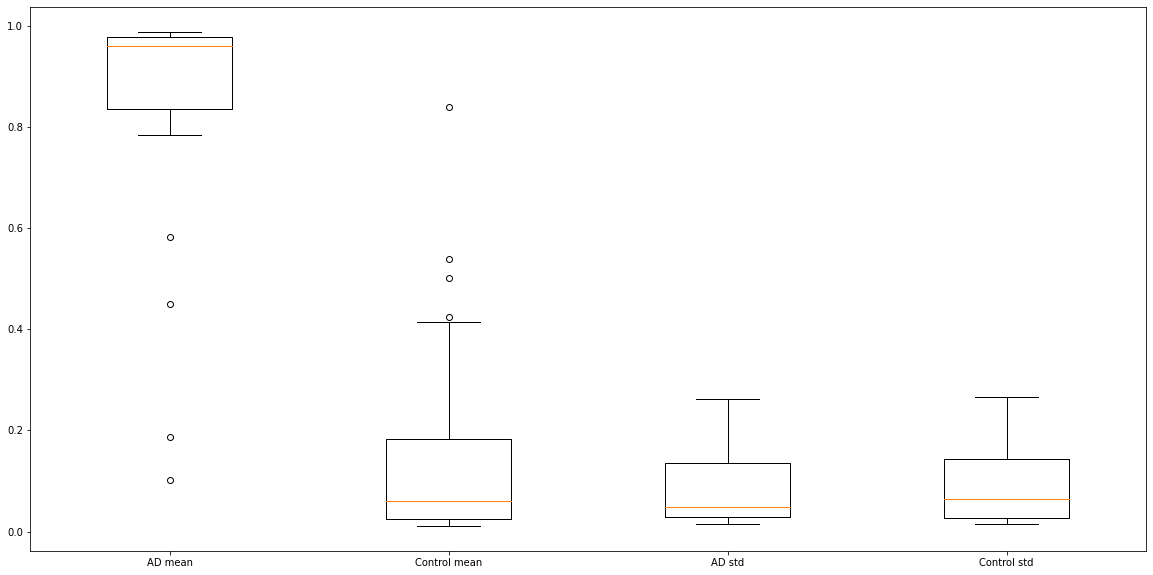

In [8]:
plt.subplots(figsize=(20, 10))
all_data = [joined_df[joined_df.diagnosis == 1]['mean'].values, 
            joined_df[joined_df.diagnosis == 0]['mean'].values,
            ##
            joined_df[joined_df.diagnosis == 1]['std'].values,
            joined_df[joined_df.diagnosis == 0]['std'].values,]


_ = plt.boxplot(all_data, labels=['AD mean', 'Control mean',
                                  'AD std', 'Control std'])
plt.show()
plt.close()

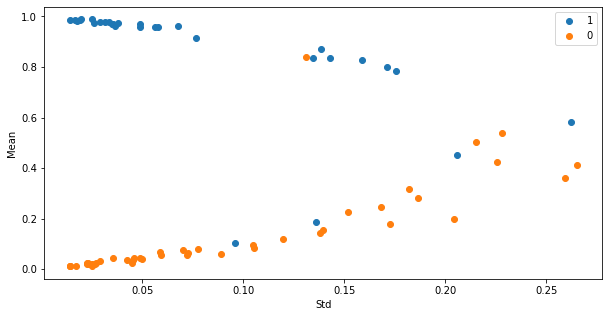

In [9]:
plot_mean_std(joined_df, [1, 0])

## MC-Drop vs single-pass: AUC-ROC/PR Curves

Best treshold for MC-Drop: 0.5821690559387207
Best treshold for Single Pass: 0.5884669423103333


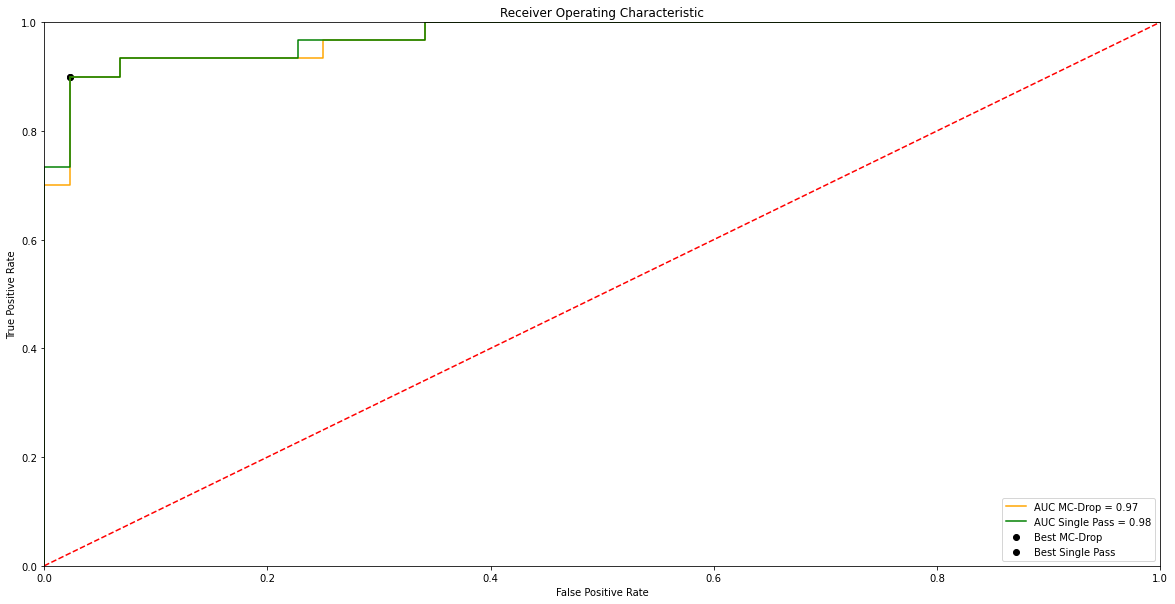

In [10]:
plot_all_roc_curves(joined_df, single_pass)

Best Threshold for MC-Drop=0.582169, F-Score=0.931
Best Threshold for Single Pass=0.588467, F-Score=0.931


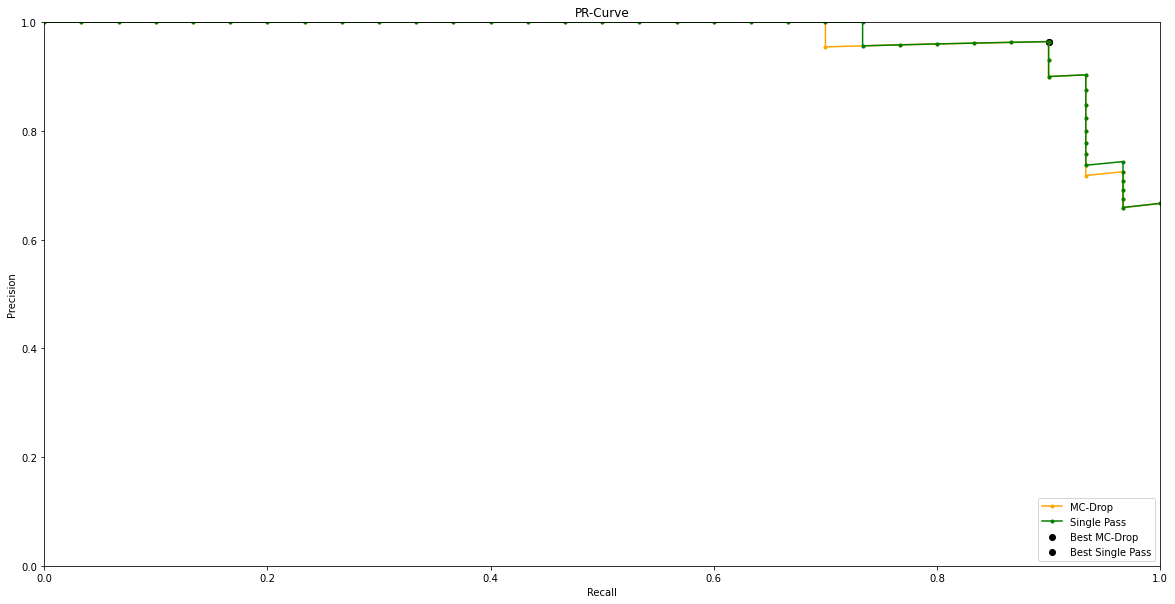

In [11]:
plot_all_pr_curves(joined_df, single_pass)

### AUC ROC Curve for training data

Best treshold for MC-Drop: 0.3765868246555328
Best treshold for Single Pass: 0.35471439361572266


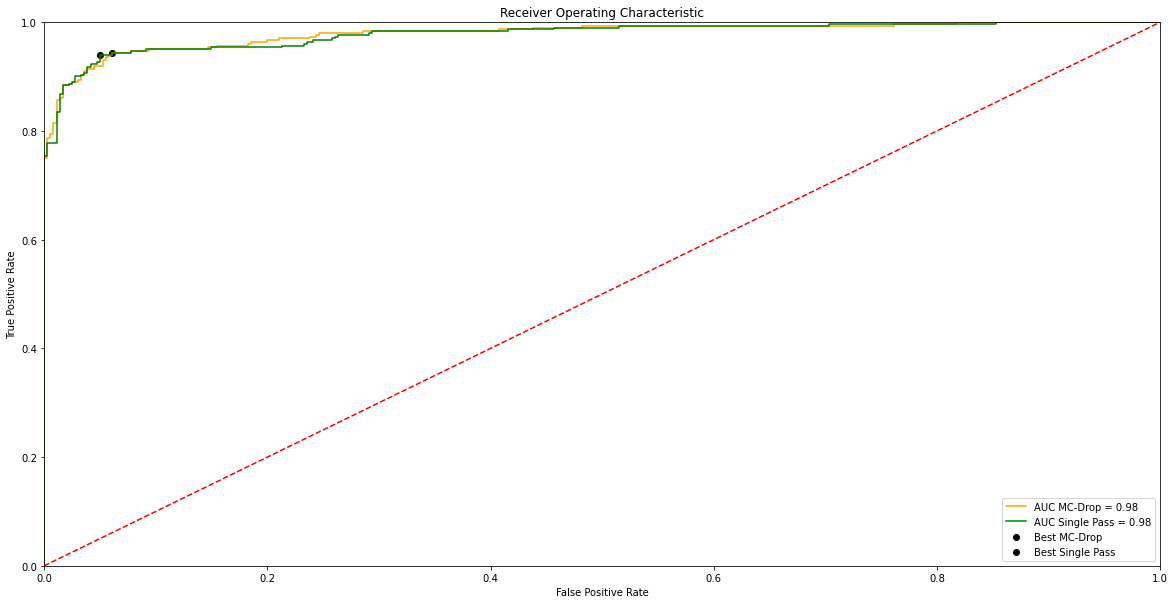

In [12]:
adni_train_diag = pd.read_csv('../data/adni_train_scaled_corrected.csv', index_col=0)['diagnosis']
res_train_df = pd.read_csv('latest_output_adni_train_50.csv', index_col=0)
joined_train_df = res_train_df.join(adni_train_diag, how='inner')



single_train_pass = pd.read_csv('latest_output_adni_train_1.csv', index_col=0)
single_train_pass = single_train_pass.join(adni_train_diag, how='inner')

plot_all_roc_curves(joined_train_df, single_train_pass)

# MC-Drop (uncertainty) vs MC-Drop (delta) vs single-pass (delta)

## At threshold = 0.5

#####################################################################################
################# MC-Drop with uncertainty thresholding
#####################################################################################


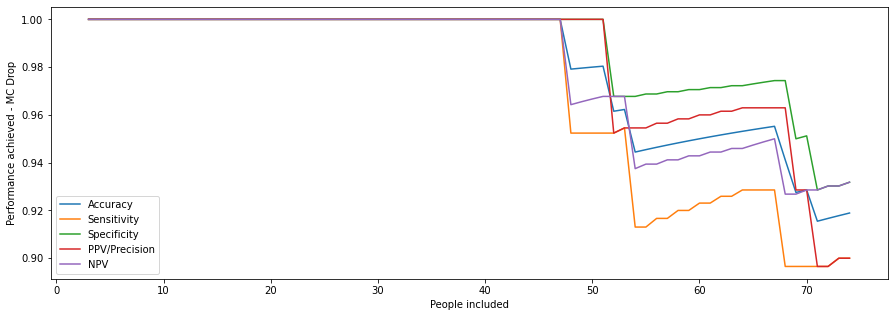

#####################################################################################
################# MC-Drop vs Single-pass
#####################################################################################


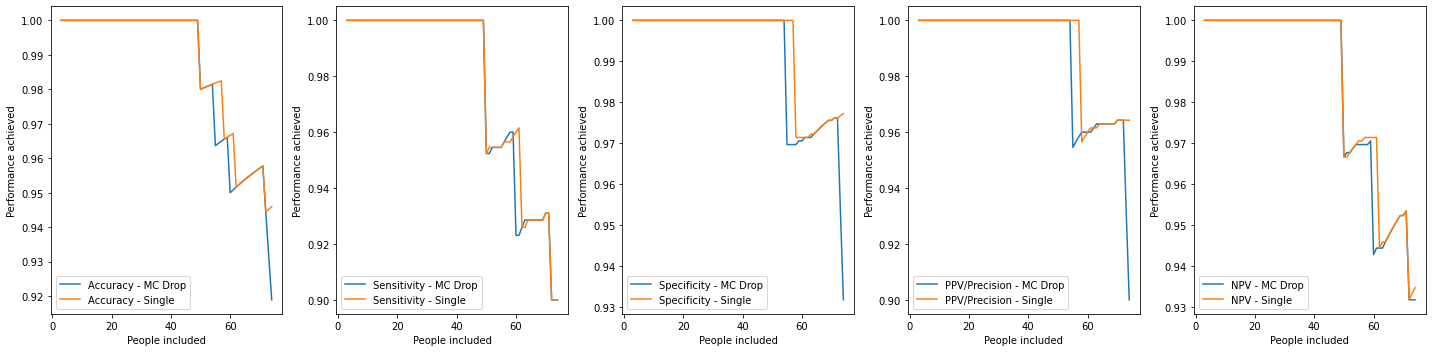

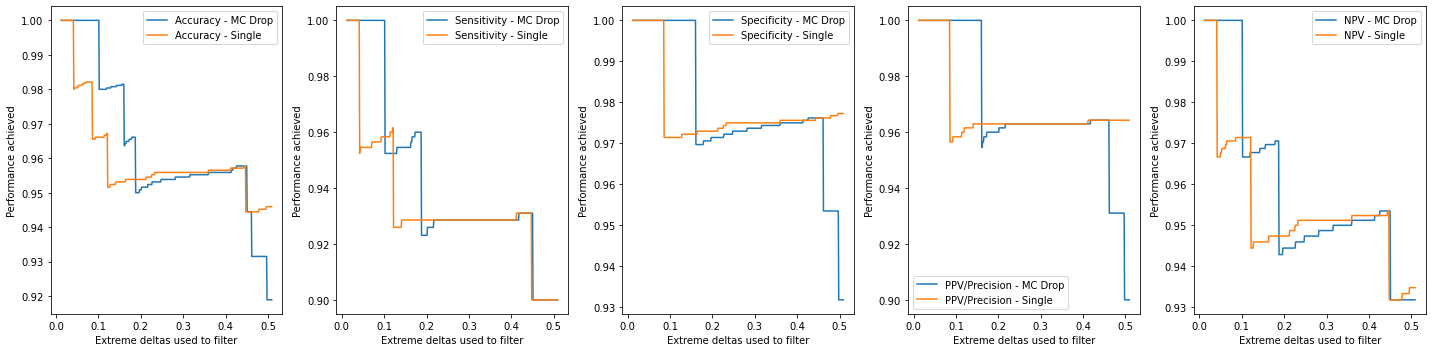

#####################################################################################
################# All 3 approaches together
#####################################################################################


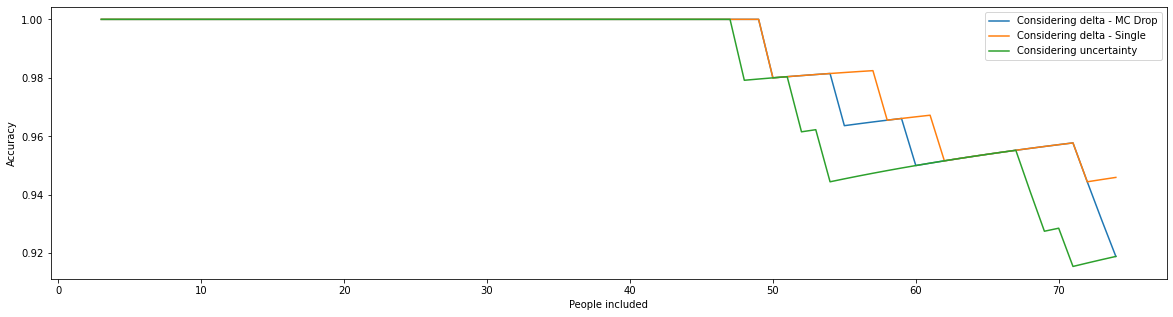

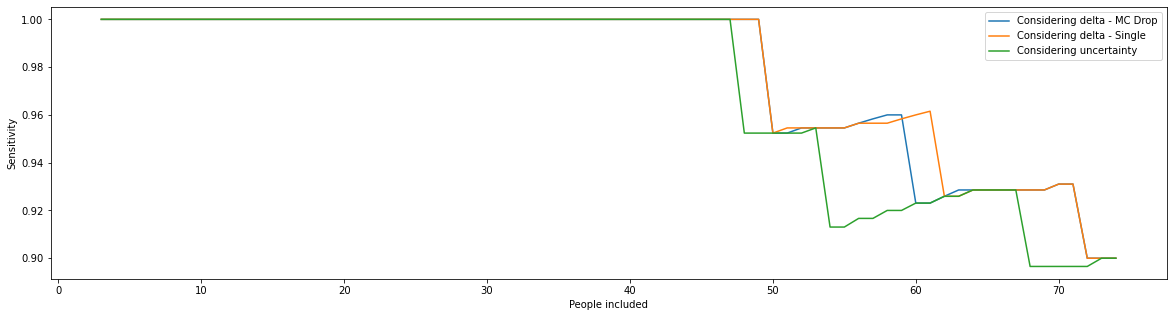

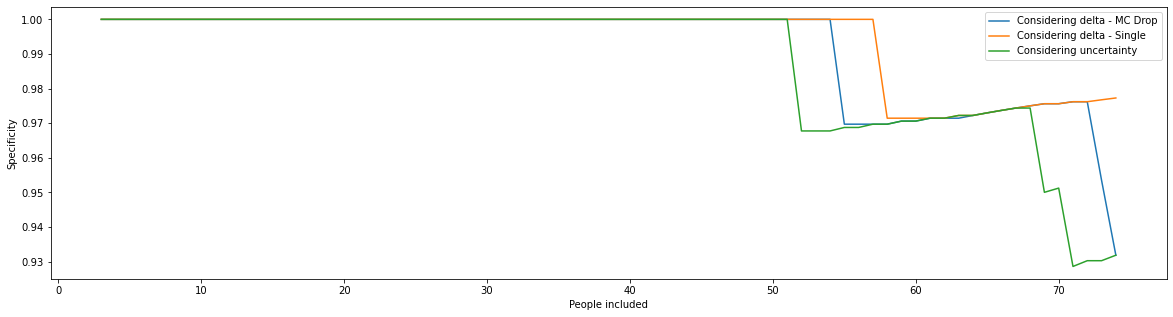

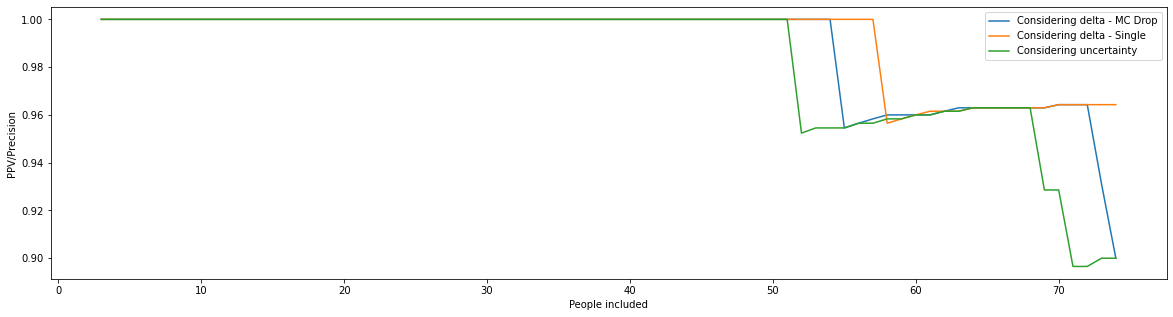

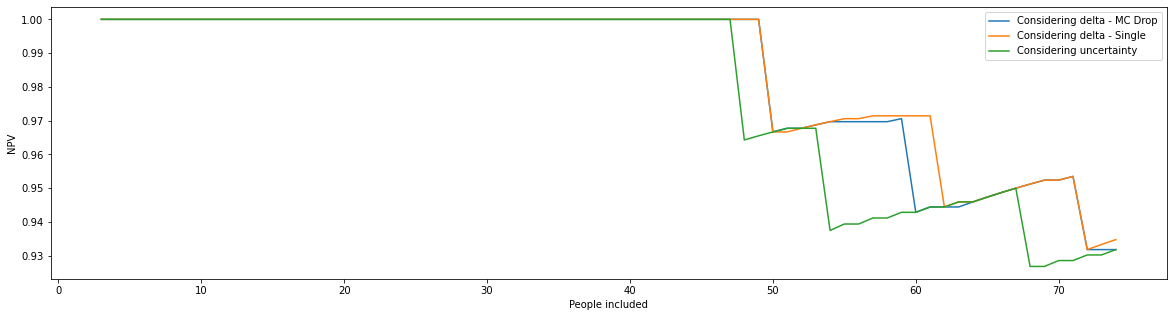

In [13]:
plot_all_comparisons(joined_df, single_pass, threshold=0.5, starting_num_people=3)

## At threshold = 0.582169

#####################################################################################
################# MC-Drop with uncertainty thresholding
#####################################################################################


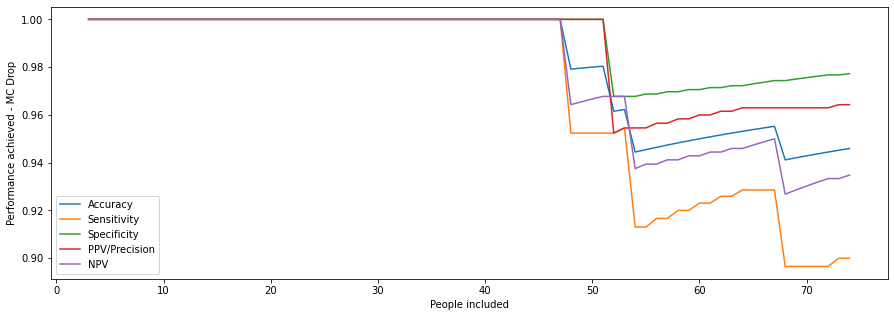

#####################################################################################
################# MC-Drop vs Single-pass
#####################################################################################


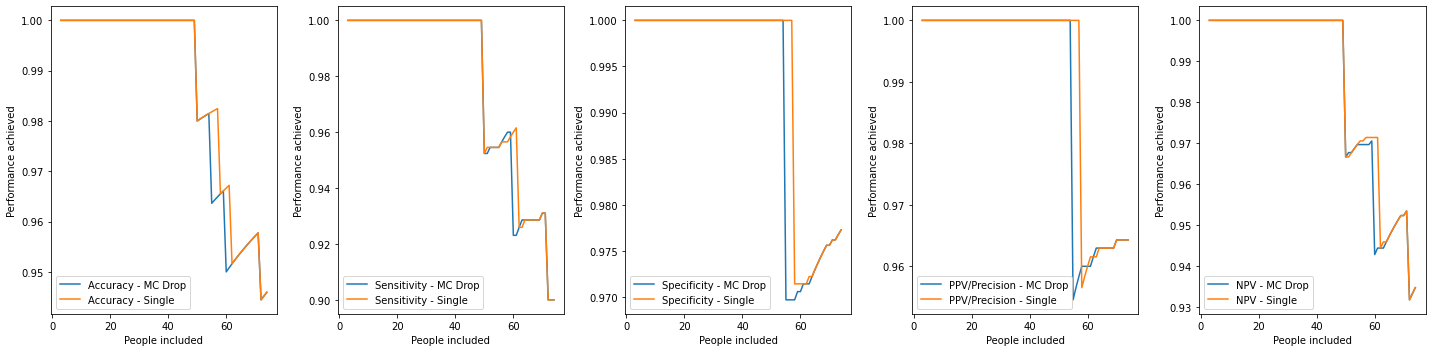

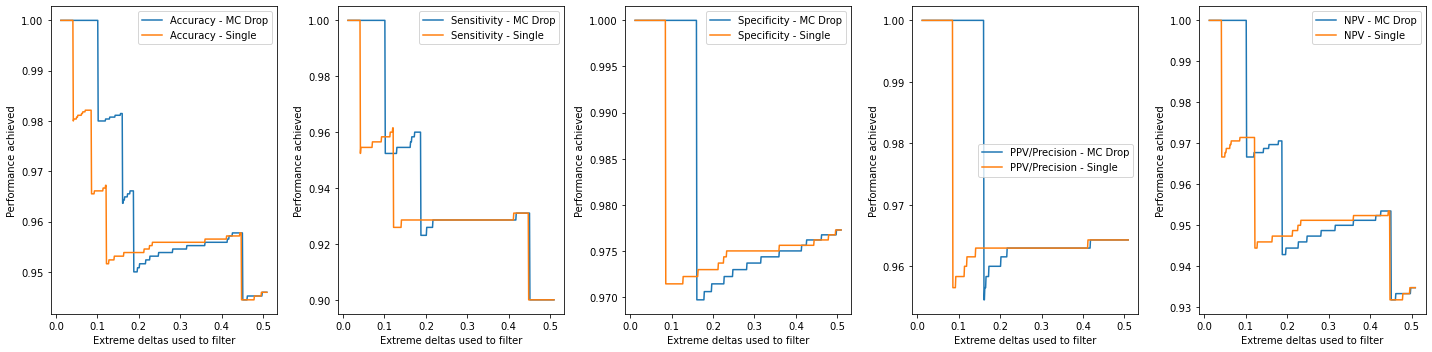

#####################################################################################
################# All 3 approaches together
#####################################################################################


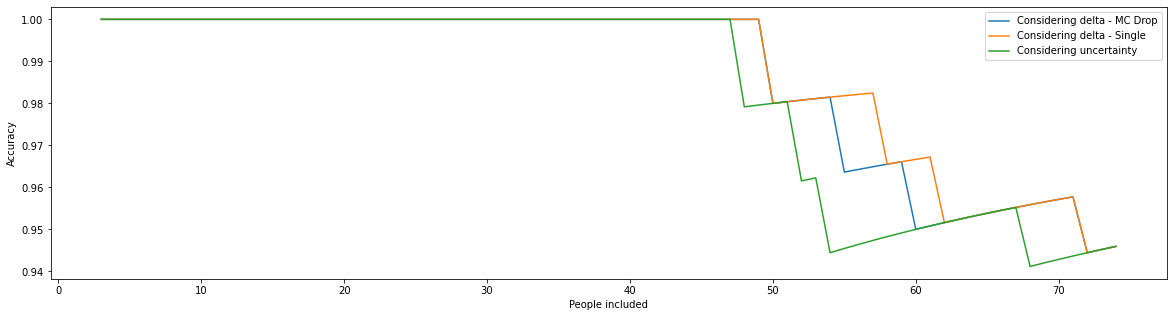

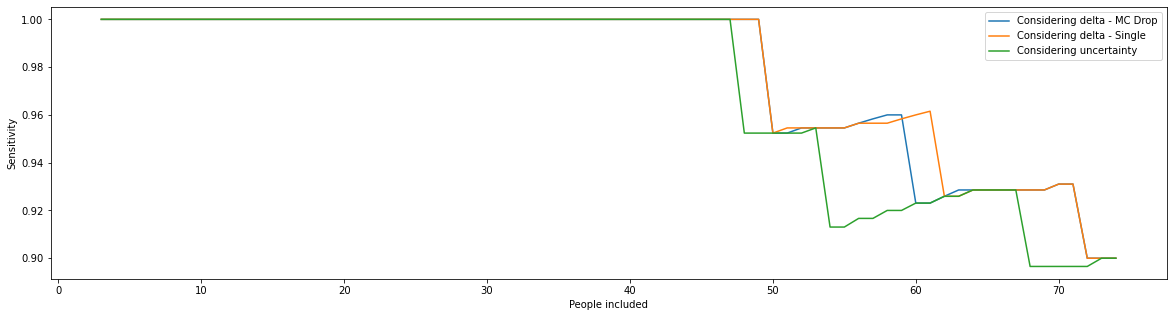

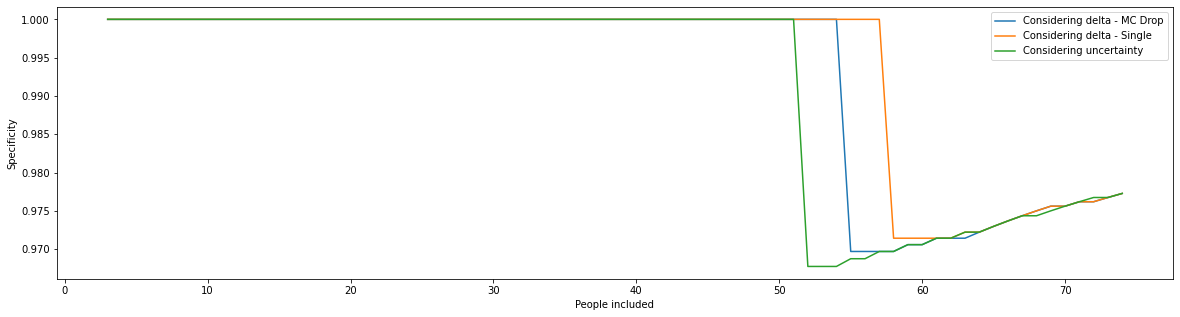

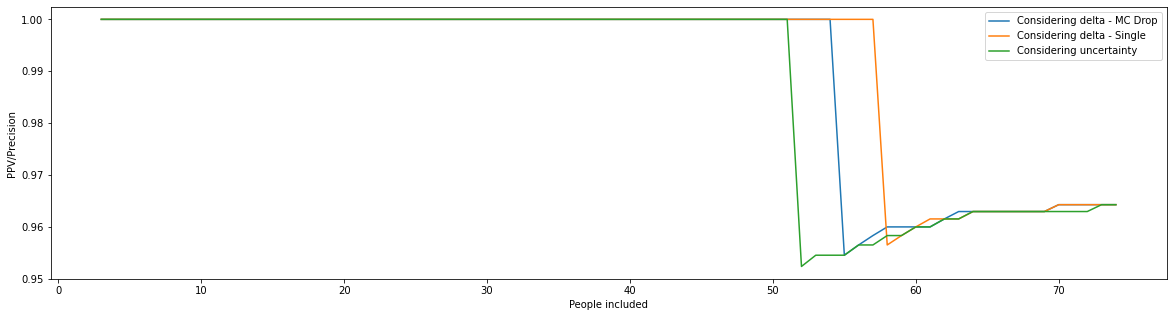

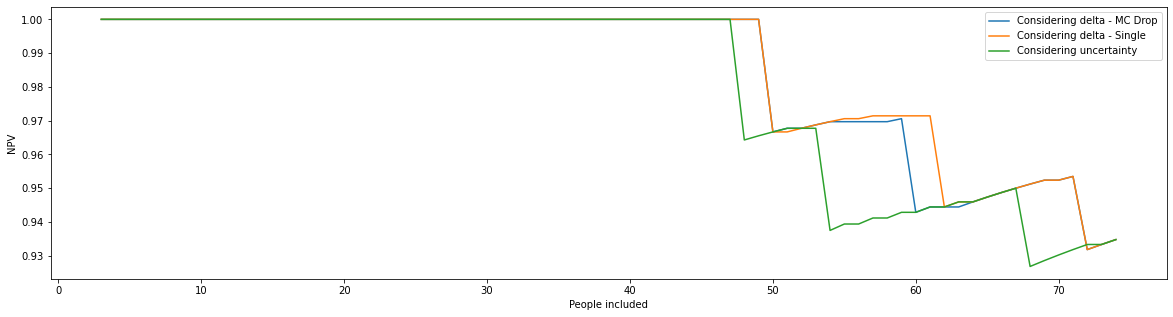

In [14]:
plot_all_comparisons(joined_df, single_pass, threshold=0.582169, starting_num_people=3)